In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from statsmodels.graphics.api import qqplot

# Deep learning
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Convolution1D, RepeatVector, TimeDistributed,Dropout

In [2]:
df = pd.read_csv("final_data.csv")

In [4]:
df.head()

,Unnamed: 0,Date,Commodity,Unit,Minimum,Maximum,Average
0,0.0,04/15/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २२.००,रू २५.००,रू २४.००
1,1.0,04/15/2013,गोलभेडा सानो(लोकल),के.जी.,रू २०.००,रू २४.००,रू २२.००
2,2.0,04/15/2013,आलु रातो,के.जी.,रू १४.००,रू १५.००,रू १५.००
3,3.0,04/15/2013,प्याज सुकेको (भारतीय),के.जी.,रू २३.००,रू २५.००,रू २४.००
4,4.0,04/15/2013,गाजर(लोकल),के.जी.,रू २८.००,रू ३५.००,रू ३१.००


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Commodity', 'Unit', 'Minimum', 'Maximum',
       'Average'],
      dtype='object')

In [6]:
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df.head()

,Date,Commodity,Unit,Minimum,Maximum,Average
0,04/15/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २२.००,रू २५.००,रू २४.००
1,04/15/2013,गोलभेडा सानो(लोकल),के.जी.,रू २०.००,रू २४.००,रू २२.००
2,04/15/2013,आलु रातो,के.जी.,रू १४.००,रू १५.००,रू १५.००
3,04/15/2013,प्याज सुकेको (भारतीय),के.जी.,रू २३.००,रू २५.००,रू २४.००
4,04/15/2013,गाजर(लोकल),के.जी.,रू २८.००,रू ३५.००,रू ३१.००


In [8]:
df.tail()

,Date,Commodity,Unit,Minimum,Maximum,Average
320427,09/25/2024,छ्यापी हरियो,के.जी.,रू ३००.००,रू ३५०.००,रू ३२६.६७
320428,09/25/2024,ताजा माछा(रहु),के जी,रू २४०.००,रू ३३५.००,रू ३०१.६७
320429,09/25/2024,ताजा माछा(बचुवा),के जी,रू २३०.००,रू २४०.००,रू २३५.००
320430,09/25/2024,ताजा माछा(छडी),के जी,रू २३०.००,रू २५०.००,रू २४०.००
320431,09/25/2024,राजा च्याउ,के.जी.,रू २८०.००,रू ३००.००,रू २९०.००


In [9]:
df.shape

(320432, 6)

In [49]:
df_tomato = df[df['Commodity'] == 'गोलभेडा सानो(लोकल)']

In [50]:
df_tomato.head()

,Date,Commodity,Unit,Minimum,Maximum,Average
1,04/15/2013,गोलभेडा सानो(लोकल),के.जी.,रू २०.००,रू २४.००,रू २२.००
73,04/16/2013,गोलभेडा सानो(लोकल),के.जी.,रू २०.००,रू २४.००,रू २२.००
143,04/17/2013,गोलभेडा सानो(लोकल),के.जी.,रू १६.००,रू २०.००,रू १८.००
213,04/18/2013,गोलभेडा सानो(लोकल),के.जी.,रू १८.००,रू २२.००,रू २०.००
293,04/21/2013,गोलभेडा सानो(लोकल),के.जी.,रू १२.००,रू १६.००,रू १४.००


In [51]:
df_tomato.tail()

,Date,Commodity,Unit,Minimum,Maximum,Average
319964,09/21/2024,गोलभेडा सानो(लोकल),के.जी.,रू ३०.००,रू ४०.००,रू ३५.००
320058,09/22/2024,गोलभेडा सानो(लोकल),के.जी.,रू ३०.००,रू ४०.००,रू ३५.००
320152,09/23/2024,गोलभेडा सानो(लोकल),के.जी.,रू ३०.००,रू ४०.००,रू ३५.००
320246,09/24/2024,गोलभेडा सानो(लोकल),के.जी.,रू ३०.००,रू ४०.००,रू ३५.००
320339,09/25/2024,गोलभेडा सानो(लोकल),के.जी.,रू २५.००,रू ३५.००,रू ३०.००


In [13]:
df_tomato.isnull().sum()

Date         0
Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [52]:
unique_date = pd.Index(df_tomato['Date'].unique())

In [53]:
unique_date

Index(['04/15/2013', '04/16/2013', '04/17/2013', '04/18/2013', '04/21/2013',
       '04/22/2013', '04/23/2013', '04/25/2013', '04/26/2013', '04/28/2013',
       ...
       '09/16/2024', '09/17/2024', '09/18/2024', '09/19/2024', '09/20/2024',
       '09/21/2024', '09/22/2024', '09/23/2024', '09/24/2024', '09/25/2024'],
      dtype='object', length=3978)

In [54]:
start_date = datetime(2013, 4, 15)
end_date = datetime.now()

# Generate the range of dates for the year 2024
date_range = []
current = start_date
end_date = datetime.now()
while current <= end_date:
    date_range.append(current.strftime('%m/%d/%Y'))
    current += timedelta(days=1)


In [55]:
date_range = pd.Index(date_range)

In [56]:
date_range

Index(['04/15/2013', '04/16/2013', '04/17/2013', '04/18/2013', '04/19/2013',
       '04/20/2013', '04/21/2013', '04/22/2013', '04/23/2013', '04/24/2013',
       ...
       '09/16/2024', '09/17/2024', '09/18/2024', '09/19/2024', '09/20/2024',
       '09/21/2024', '09/22/2024', '09/23/2024', '09/24/2024', '09/25/2024'],
      dtype='object', length=4182)

In [57]:
missing_dates = date_range.difference(unique_date)

In [58]:
missing_dates

Index(['01/04/2014', '01/10/2015', '01/11/2014', '01/15/2014', '01/15/2018',
       '01/18/2014', '01/24/2015', '01/24/2023', '01/25/2014', '01/30/2014',
       ...
       '12/21/2013', '12/21/2017', '12/22/2017', '12/23/2017', '12/24/2017',
       '12/25/2013', '12/25/2017', '12/26/2017', '12/28/2013', '12/30/2013'],
      dtype='object', length=204)

In [59]:
print("Missing Price lengths :",len(missing_dates))

Missing Price lengths : 204


In [60]:
columns = ['Date', 'Commodity', 'Unit', 'Minimum', 'Maximum', 'Average']

In [61]:
complete_df = pd.DataFrame(date_range, columns=['Date'])

In [62]:
final_df = pd.merge(complete_df,df_tomato, on=['Date'], how='left')


In [63]:
final_df

,Date,Commodity,Unit,Minimum,Maximum,Average
0,04/15/2013,गोलभेडा सानो(लोकल),के.जी.,रू २०.००,रू २४.००,रू २२.००
1,04/16/2013,गोलभेडा सानो(लोकल),के.जी.,रू २०.००,रू २४.००,रू २२.००
2,04/17/2013,गोलभेडा सानो(लोकल),के.जी.,रू १६.००,रू २०.००,रू १८.००
3,04/18/2013,गोलभेडा सानो(लोकल),के.जी.,रू १८.००,रू २२.००,रू २०.००
4,04/19/2013,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4177,09/21/2024,गोलभेडा सानो(लोकल),के.जी.,रू ३०.००,रू ४०.००,रू ३५.००
4178,09/22/2024,गोलभेडा सानो(लोकल),के.जी.,रू ३०.००,रू ४०.००,रू ३५.००
4179,09/23/2024,गोलभेडा सानो(लोकल),के.जी.,रू ३०.००,रू ४०.००,रू ३५.००
4180,09/24/2024,गोलभेडा सानो(लोकल),के.जी.,रू ३०.००,रू ४०.००,रू ३५.००


In [64]:
final_df.drop(columns=['Commodity', 'Unit', 'Minimum', 'Maximum'], inplace=True)

In [65]:
final_df

,Date,Average
0,04/15/2013,रू २२.००
1,04/16/2013,रू २२.००
2,04/17/2013,रू १८.००
3,04/18/2013,रू २०.००
4,04/19/2013,NaN
...,...,...
4177,09/21/2024,रू ३५.००
4178,09/22/2024,रू ३५.००
4179,09/23/2024,रू ३५.००
4180,09/24/2024,रू ३५.००


In [66]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4182 non-null   object
 1   Average  3978 non-null   object
dtypes: object(2)
memory usage: 65.5+ KB


In [67]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4182 non-null   datetime64[ns]
 1   Average  3978 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 65.5+ KB


In [69]:
final_df['Date'] = final_df['Date'].dt.date

In [70]:
final_df.set_index('Date', inplace=True)

In [71]:
final_df

,Average
Date,
2013-04-15,रू २२.००
2013-04-16,रू २२.००
2013-04-17,रू १८.००
2013-04-18,रू २०.००
2013-04-19,NaN
...,...
2024-09-21,रू ३५.००
2024-09-22,रू ३५.००
2024-09-23,रू ३५.००


In [72]:
final_df['Average'] = final_df['Average'].str.replace("रू","")

In [73]:
final_df

,Average
Date,
2013-04-15,२२.००
2013-04-16,२२.००
2013-04-17,१८.००
2013-04-18,२०.००
2013-04-19,NaN
...,...
2024-09-21,३५.००
2024-09-22,३५.००
2024-09-23,३५.००


In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4182 entries, 2013-04-15 to 2024-09-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Average  3978 non-null   object
dtypes: object(1)
memory usage: 65.3+ KB


In [75]:
df_tomato_indian = df_tomato = df[df['Commodity'] == 'गोलभेडा ठूलो(भारतीय)']

In [76]:
df_tomato_indian = df_tomato_indian[['Date','Average']] 

In [77]:
df_tomato_indian

,Date,Average
146699,06/25/2019,रू ७८.००
146779,06/26/2019,रू ८३.००
146859,06/27/2019,रू ८८.००
146937,06/28/2019,रू ८८.००
147016,06/29/2019,रू ८८.००
...,...,...
319963,09/21/2024,रू ८५.००
320057,09/22/2024,रू ८५.००
320151,09/23/2024,रू ८५.००
320245,09/24/2024,रू ८५.००


In [78]:
df_tomato_indian['Date'] = pd.to_datetime(df_tomato_indian['Date'], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")

C:\Users\BishwajyotiChaudhary\AppData\Local\Temp\ipykernel_7180\1396478228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomato_indian['Date'] = pd.to_datetime(df_tomato_indian['Date'], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")


In [79]:
df_tomato_indian

,Date,Average
146699,2019-06-25,रू ७८.००
146779,2019-06-26,रू ८३.००
146859,2019-06-27,रू ८८.००
146937,2019-06-28,रू ८८.००
147016,2019-06-29,रू ८८.००
...,...,...
319963,2024-09-21,रू ८५.००
320057,2024-09-22,रू ८५.००
320151,2024-09-23,रू ८५.००
320245,2024-09-24,रू ८५.००


In [80]:
df_tomato_indian.set_index('Date', inplace=True)

In [81]:
df_tomato_indian

,Average
Date,
2019-06-25,रू ७८.००
2019-06-26,रू ८३.००
2019-06-27,रू ८८.००
2019-06-28,रू ८८.००
2019-06-29,रू ८८.००
...,...
2024-09-21,रू ८५.००
2024-09-22,रू ८५.००
2024-09-23,रू ८५.००


In [82]:
df_tomato_indian['Average'] = df_tomato_indian['Average'].str.replace("रू","")

C:\Users\BishwajyotiChaudhary\AppData\Local\Temp\ipykernel_7180\1517611697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomato_indian['Average'] = df_tomato_indian['Average'].str.replace("रू","")


In [83]:
final_df[final_df['Average'].isnull()].index

Index([2013-04-19, 2013-04-20, 2013-04-24, 2013-04-27, 2013-05-01, 2013-05-04,
       2013-05-11, 2013-05-18, 2013-05-25, 2013-05-29,
       ...
       2024-02-11, 2024-02-12, 2024-02-13, 2024-02-14, 2024-02-15, 2024-02-16,
       2024-02-17, 2024-02-18, 2024-02-19, 2024-03-03],
      dtype='object', name='Date', length=204)

In [84]:
df_tomato_indian.index

Index(['2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29',
       '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
       ...
       '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
       '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25'],
      dtype='object', name='Date', length=1569)

In [85]:
devanagari_to_english = {
    '०': '0', '१': '1', '२': '2', '३': '3', '४': '4',
    '५': '5', '६': '6', '७': '7', '८': '8', '९': '9'
}

def replace_devanagari_with_eng(text):
    for dev, eng in devanagari_to_english.items():
        text = text.replace(dev, eng)
    return text

final_df['Average'] = final_df['Average'].astype('str').apply(replace_devanagari_with_eng).astype('float')


In [86]:
df_tomato_indian['Average'] = final_df['Average'].astype('str').apply(replace_devanagari_with_eng).astype('float')

C:\Users\BishwajyotiChaudhary\AppData\Local\Temp\ipykernel_7180\3575955223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomato_indian['Average'] = final_df['Average'].astype('str').apply(replace_devanagari_with_eng).astype('float')


In [87]:
final_df

,Average
Date,
2013-04-15,22.0
2013-04-16,22.0
2013-04-17,18.0
2013-04-18,20.0
2013-04-19,NaN
...,...
2024-09-21,35.0
2024-09-22,35.0
2024-09-23,35.0


In [88]:
final_df.isnull().sum()

Average    204
dtype: int64

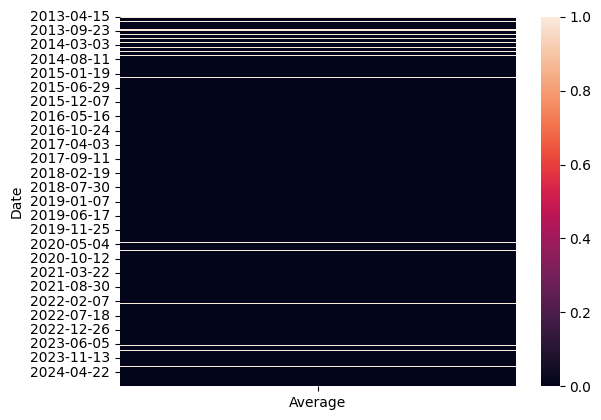

In [89]:
sns.heatmap(final_df.isnull(), cbar=True)
plt.show()

In [90]:
final_df.fillna(final_df.ewm(span=7, adjust=False).mean(), inplace=True)

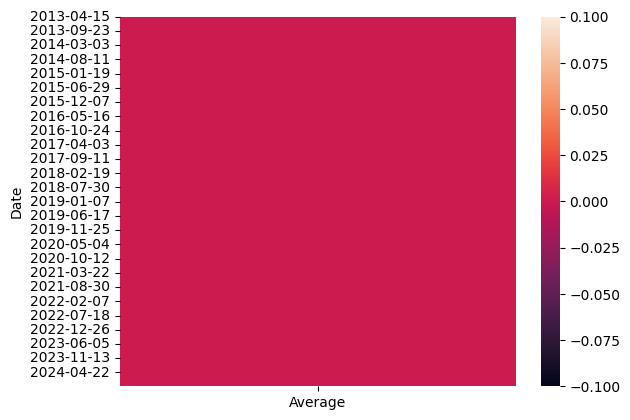

In [91]:
sns.heatmap(final_df.isnull(), cbar=True)
plt.show()

In [92]:
final_df.head()

,Average
Date,
2013-04-15,22.00
2013-04-16,22.00
2013-04-17,18.00
2013-04-18,20.00
2013-04-19,20.75


In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4182 entries, 2013-04-15 to 2024-09-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Average  4182 non-null   float64
dtypes: float64(1)
memory usage: 194.4+ KB


In [94]:
final_df.describe()

,Average
count,4182.000000
mean,36.208327
std,16.951972
min,5.800000
25%,22.500000
50%,33.000000
75%,46.000000
max,118.000000


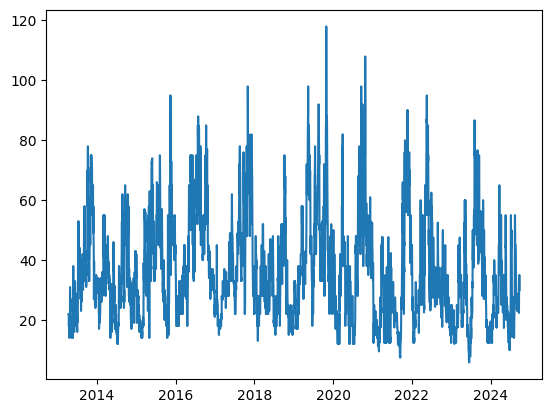

In [95]:
plt.plot(final_df)

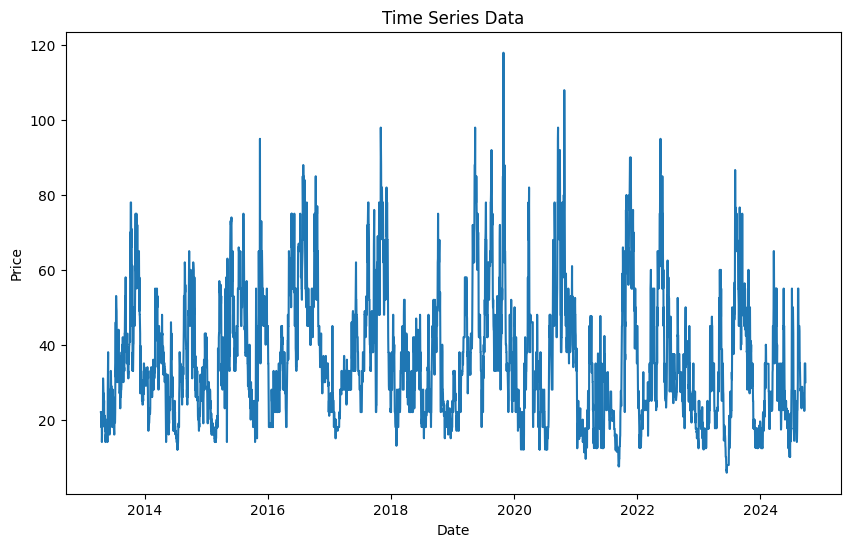

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(final_df.index, final_df['Average'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [97]:
decomposition = seasonal_decompose(final_df['Average'], model='additive', period=6)

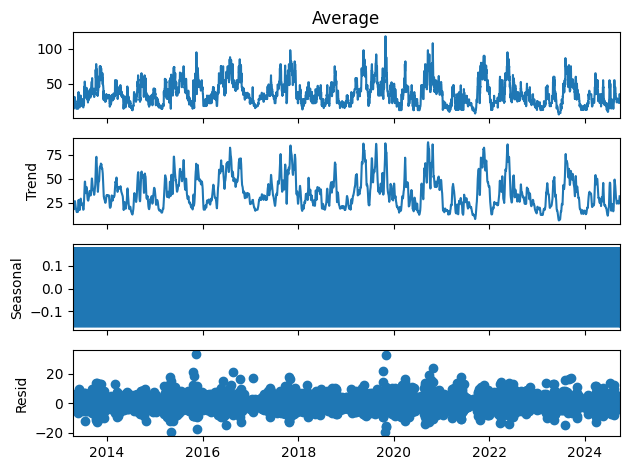

In [98]:
decomposition.plot();
plt.show()

In [99]:
decomposition = seasonal_decompose(final_df['Average'], model='multiplicative', period=6)

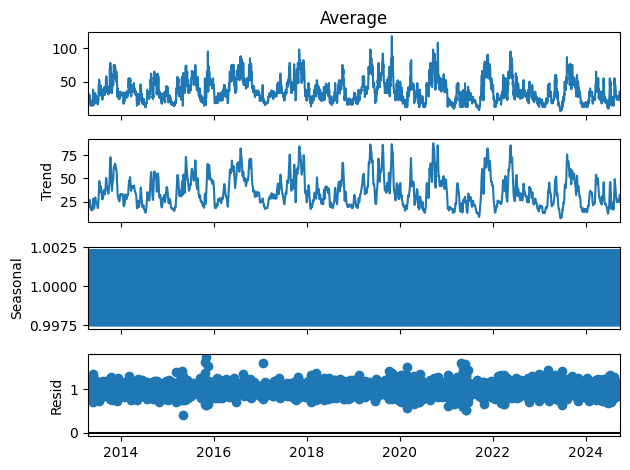

In [100]:
decomposition.plot()
plt.show()

The observed data shows clear variability over time, with repeated peaks, but no strong seasonal effect.
The trend shows a clear underlying movement, possibly indicating cycles of increases and decreases over time.
The seasonal component is insignificant (flat), meaning that the data likely does not have a periodic seasonal pattern.
The residuals appear evenly distributed, suggesting that most of the systematic variation is captured by the trend component.

In [63]:
decomposition.trend

Date
2013-04-15          NaN
2013-04-16          NaN
2013-04-17          NaN
2013-04-18    19.916667
2013-04-19    18.750000
                ...    
2024-09-19    26.776667
2024-09-20    28.276667
2024-09-21          NaN
2024-09-22          NaN
2024-09-23          NaN
Name: trend, Length: 4180, dtype: float64

In [64]:
decomposition.resid

Date
2013-04-15         NaN
2013-04-16         NaN
2013-04-17         NaN
2013-04-18    1.002802
2013-04-19    1.109391
                ...   
2024-09-19    0.834792
2024-09-20    0.882745
2024-09-21         NaN
2024-09-22         NaN
2024-09-23         NaN
Name: resid, Length: 4180, dtype: float64

In [65]:
decomposition.seasonal

Date
2013-04-15    1.001559
2013-04-16    1.002152
2013-04-17    0.998393
2013-04-18    1.001378
2013-04-19    0.997545
                ...   
2024-09-19    0.998973
2024-09-20    1.001559
2024-09-21    1.002152
2024-09-22    0.998393
2024-09-23    1.001378
Name: seasonal, Length: 4180, dtype: float64

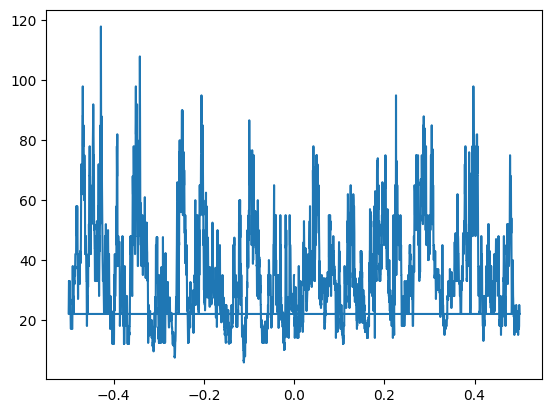

In [66]:
fft = np.fft.fft(final_df)
freqs = np.fft.fftfreq(len(fft))
plt.plot(freqs, np.abs(fft))
plt.show()

##plotting the magnitude of the FFT

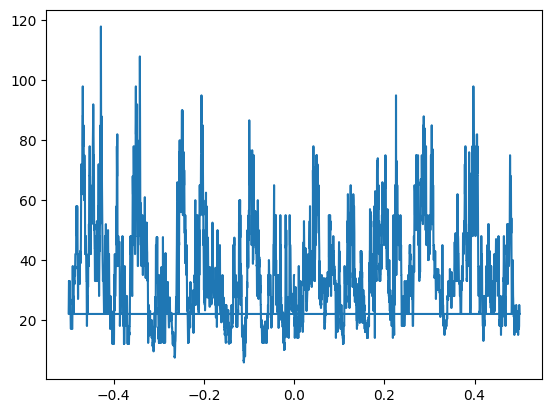

In [67]:

fft = np.fft.fft(final_df)
freqs = np.fft.fftfreq(len(fft))
plt.plot(freqs, np.abs(fft))
plt.show()


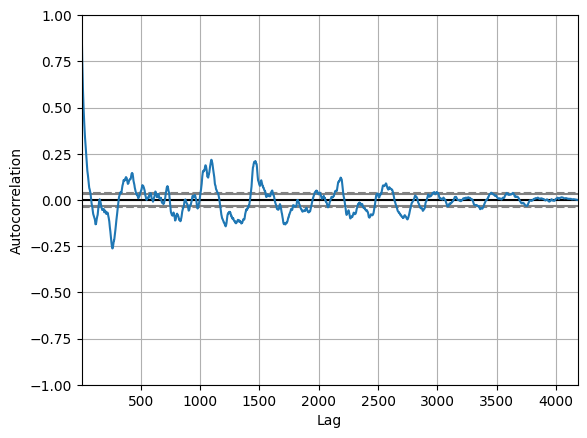

In [101]:
autocorrelation_plot(final_df)
plt.show()

Trend/Persistence: The slow decay of autocorrelation indicates that the time series has some persistence or trend component, meaning past values are influencing future values.

Possible Seasonality: Small peaks between lags 500 and 1500 suggest weak cyclical patterns, but these aren’t strong enough to indicate regular, strong seasonality.

Stationarity: Since the autocorrelation doesn’t oscillate wildly or stay high for long, the series could be weakly stationary, meaning its statistical properties (mean, variance) do not change dramatically over time, though this could still require formal tests like the Augmented Dickey-Fuller (ADF) test.

ADF Test detects unit root stationarity (or difference stationarity), which means that after differencing, the series might become stationary.
KPSS Test detects trend stationarity, which means that the series is stationary around a deterministic trend. This is useful because the ADF test might suggest a series is non-stationary, even if it is trend-stationary.

In [102]:
from statsmodels.tsa.stattools import adfuller, kpss


# Augmented Dickey-Fuller Test (ADF)
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    if result[1] < 0.05:
        print("The data is stationary according to the ADF test (Reject Null Hypothesis).")
    else:
        print("The data is non-stationary according to the ADF test (Fail to reject Null Hypothesis).")

# KPSS Test
def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    if result[1] < 0.05:
        print("The data is non-stationary according to the KPSS test (Reject Null Hypothesis ).")
    else:
        print("The data is stationary according to the KPSS test (Fail to Reject Null Hypothesis).")


In [103]:
adf_test(final_df)
print("**"*30)
print("**"*30)
kpss_test(final_df)

ADF Test Statistic: -9.589904
p-value: 0.000000
Critical Values:
   1%, -3.4319157624548438
Critical Values:
   5%, -2.8622318677802716
Critical Values:
   10%, -2.5671382871908053
The data is stationary according to the ADF test (Reject Null Hypothesis).
************************************************************
************************************************************
KPSS Test Statistic: 0.324342
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739
The data is stationary according to the KPSS test (Fail to Reject Null Hypothesis).


C:\Users\BishwajyotiChaudhary\AppData\Local\Temp\ipykernel_7180\2193668991.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


Scenario 1: ADF test says the series is stationary, but KPSS test says it is non-stationary.

This could indicate that the series has a trend and is trend-stationary, meaning you might want to remove the trend rather than difference the data.
Scenario 2: Both ADF and KPSS tests say the series is stationary.

In this case, you can confidently proceed, knowing the data is stationary and ready for modeling.
Scenario 3: Both ADF and KPSS tests say the series is non-stationary.

This likely means you need to apply transformations (e.g., differencing or detrending) to make the data stationary.

In [71]:
# Differencing the data
final_df_diff = final_df.diff().dropna()


adf_test(final_df_diff)
kpss_test(final_df_diff)


ADF Test Statistic: -18.220760
p-value: 0.000000
Critical Values:
   1%, -3.4319232966238484
Critical Values:
   5%, -2.8622351960442405
Critical Values:
   10%, -2.5671400590052276
The data is stationary according to the ADF test (Reject Null Hypothesis).
KPSS Test Statistic: 0.007382
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739
The data is stationary according to the KPSS test (Fail to Reject Null Hypothesis).


C:\Users\BishwajyotiChaudhary\AppData\Local\Temp\ipykernel_13872\2193668991.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


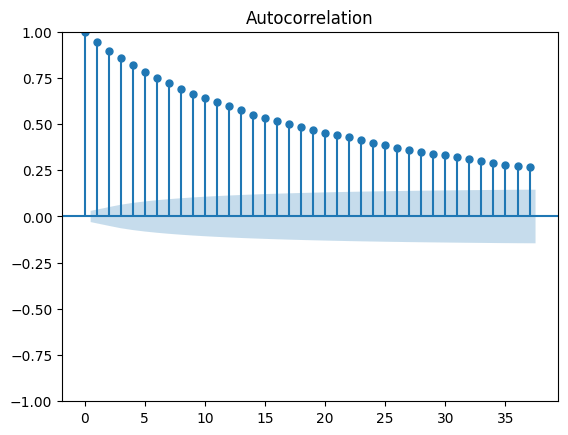

************************************************************


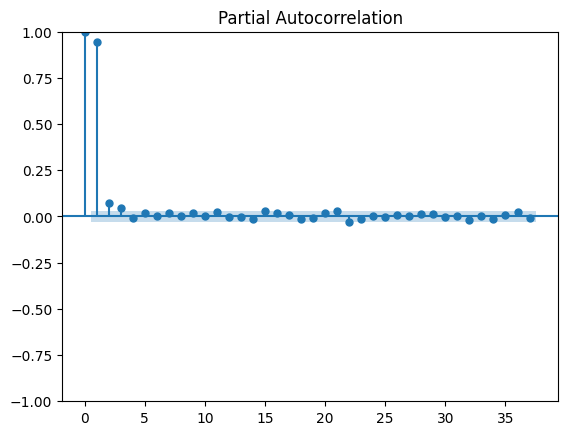

In [104]:
# Plot ACF
plot_acf(final_df)
plt.show()
print("**"*30)
# Plot PACF
plot_pacf(final_df)
plt.show()


In the  plot, the autocorrelation coefficients appear to decrease as the lag increases, suggesting that there is a strong correlation between values at nearby time points but a weaker correlation between values at more distant time points

The slow decay of the ACF suggests that the AR component might be of higher order than 1 or 2.

The PACF plot shows a significant spike at lag 1, indicating a strong correlation between the current value and the value at the previous time step.

The spikes in the PACF plot decay relatively quickly after lag 1, suggesting that the correlation between the current value and values at lags greater than 1 is not as strong.

In [105]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [106]:
def arima_model(X,y,arima_order):
    history=[i for i in X]
    prediction=list()
    for i in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        y_hat = model_fit.forecast()
        prediction.append(y_hat)
        history.append(y[i])
    mse = np.sqrt(mean_squared_error(y, prediction))
    return mse,prediction,model_fit, history

In [107]:
length = final_df.shape[0]

In [108]:
length

4182

In [144]:
train_data = final_df[:int(length*0.8)]

In [110]:
len(train_data)

3345

In [145]:
test_data = final_df[int(length*0.8):]

In [112]:
len(test_data)

837

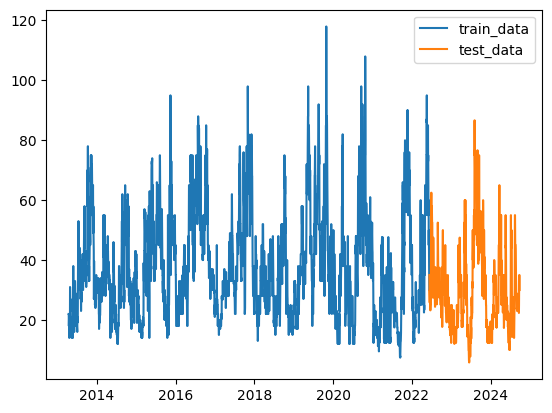

In [113]:
plt.plot(train_data,label="train_data")
plt.plot(test_data, label="test_data")
plt.legend();

In [114]:
p = 1
q = 0
d = 1 
order = (p,d,q)

In [83]:
[i for i in train_data['Average']]

[22.0,
 22.0,
 18.0,
 20.0,
 20.75,
 20.75,
 14.0,
 16.0,
 22.0,
 18.75908430232558,
 20.0,
 19.0,
 19.105678387745975,
 31.0,
 29.0,
 28.0,
 25.243076679843384,
 27.0,
 23.0,
 25.087751352995603,
 20.0,
 20.0,
 18.0,
 21.0,
 21.0,
 17.0,
 20.203043284930995,
 14.0,
 14.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.38627221034736,
 17.0,
 16.0,
 16.0,
 16.0,
 15.0,
 14.0,
 15.448976661961366,
 28.0,
 32.0,
 38.0,
 26.362341873167647,
 25.0,
 21.0,
 24.707369818760125,
 19.0,
 19.0,
 17.0,
 16.0,
 16.0,
 18.6564521027272,
 18.6564521027272,
 28.0,
 23.0,
 26.0,
 30.0,
 33.0,
 32.0,
 28.220066820630297,
 29.0,
 23.0,
 24.0,
 26.0,
 24.0,
 18.0,
 23.760538321568394,
 23.760538321568394,
 23.760538321568394,
 28.0,
 23.0,
 21.0,
 26.0,
 24.48526910660238,
 20.0,
 18.0,
 17.0,
 16.0,
 16.0,
 21.0,
 19.199765890635472,
 19.199765890635472,
 19.199765890635472,
 22.0,
 33.0,
 35.0,
 46.0,
 31.32444913823489,
 53.0,
 53.0,
 50.0,
 49.0,
 43.0,
 38.0,
 42.93506387209433,
 30.0,
 30.0,
 33.0,
 34.0,
 43.0,

In [115]:
mse,pridiction, model_fit, history  = arima_model(train_data['Average'], test_data['Average'],order)

C:\Users\BishwajyotiChaudhary\AppData\Local\Temp\ipykernel_7180\3135914616.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[i])


In [116]:
mse

np.float64(5.041687268524949)

In [117]:
pridiction[-1]

array([35.])

In [119]:
residual = model_fit.resid

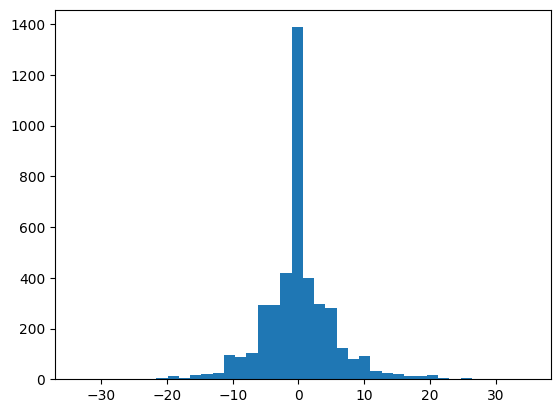

In [120]:
plt.hist(residual,bins=40);

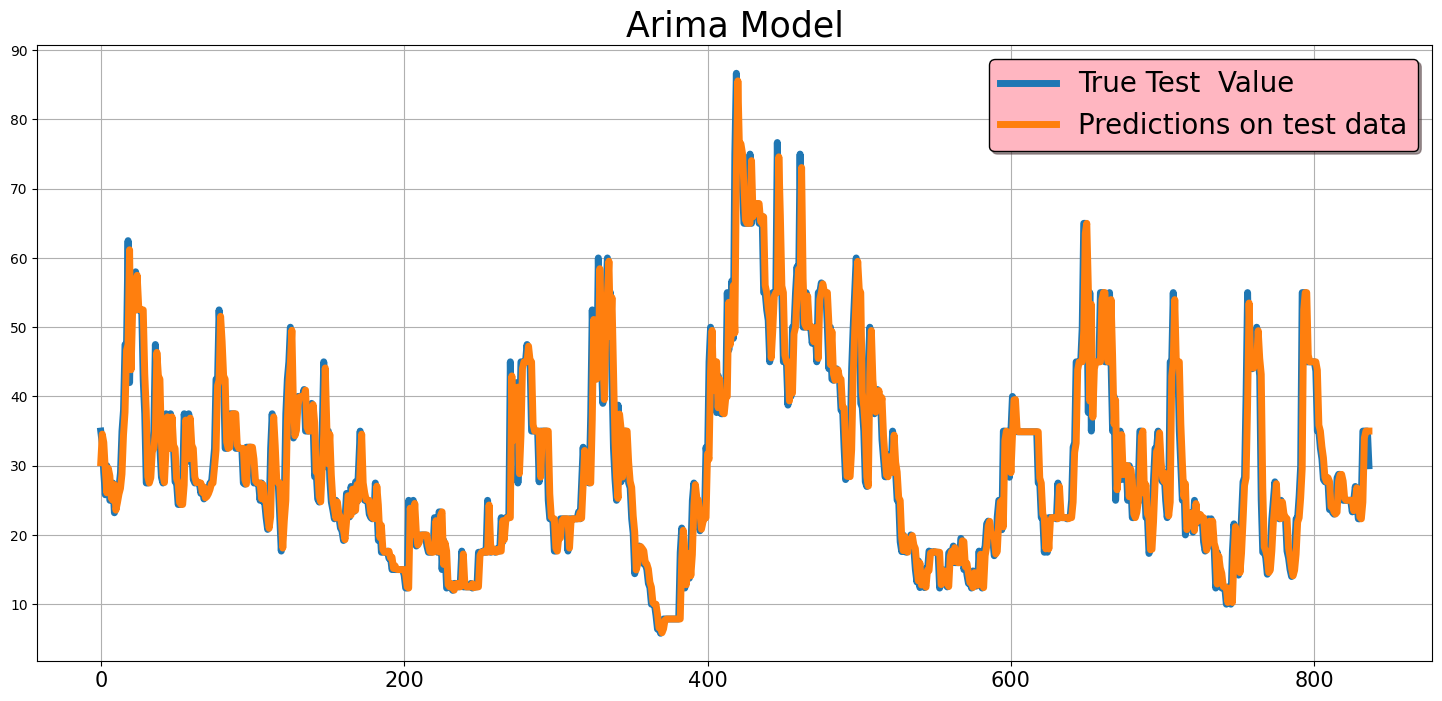

In [121]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.title("Arima Model",fontsize = 25)
plt.plot(range(len(test_data)),test_data, label = 'True Test  Value', linewidth = 5)
plt.plot(range(len(pridiction)), pridiction, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [122]:
test_data

,Average
Date,
2022-06-12,35.0
2022-06-13,33.2
2022-06-14,29.0
2022-06-15,25.8
2022-06-16,30.0
...,...
2024-09-21,35.0
2024-09-22,35.0
2024-09-23,35.0


In [123]:
residual = model_fit.resid

In [124]:
residual

array([ 2.20000000e+01,  6.97496592e-05, -4.00000000e+00, ...,
        9.74239274e-01,  0.00000000e+00,  0.00000000e+00])

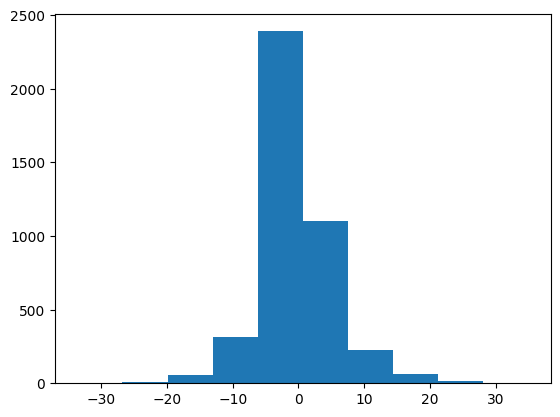

In [125]:
plt.hist(residual);

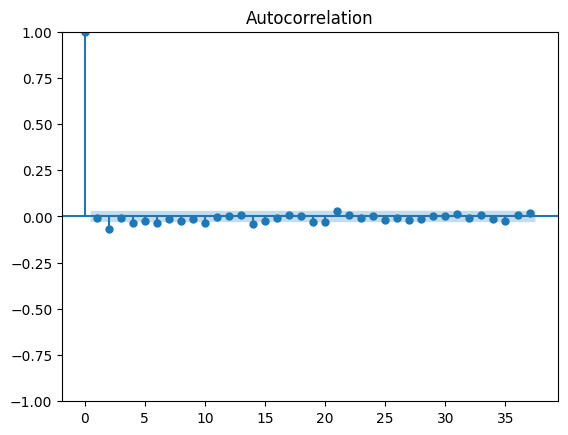

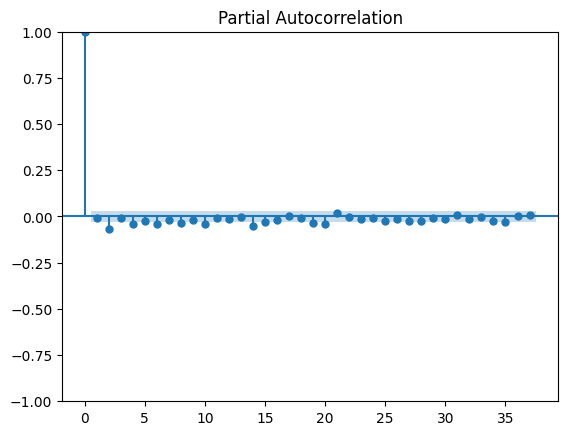

In [126]:
plot_acf(residual);
plot_pacf(residual);

In [127]:
train_data

,Average
Date,
2013-04-15,22.00
2013-04-16,22.00
2013-04-17,18.00
2013-04-18,20.00
2013-04-19,20.75
...,...
2022-06-07,50.00
2022-06-08,45.00
2022-06-09,45.00


In [128]:
def forecast_price(days):
    future_forecast = model_fit.forecast(steps=days)
    forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=days, freq='D')
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.tail(120).index, test_data.tail(120), label='Test Data', color='green')
    plt.plot(forecast_index, future_forecast, label='Future Forecast', color='red')
    plt.title('Observed Data (Train & Test) and Future forecast')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

In [129]:
test_data

,Average
Date,
2022-06-12,35.0
2022-06-13,33.2
2022-06-14,29.0
2022-06-15,25.8
2022-06-16,30.0
...,...
2024-09-21,35.0
2024-09-22,35.0
2024-09-23,35.0


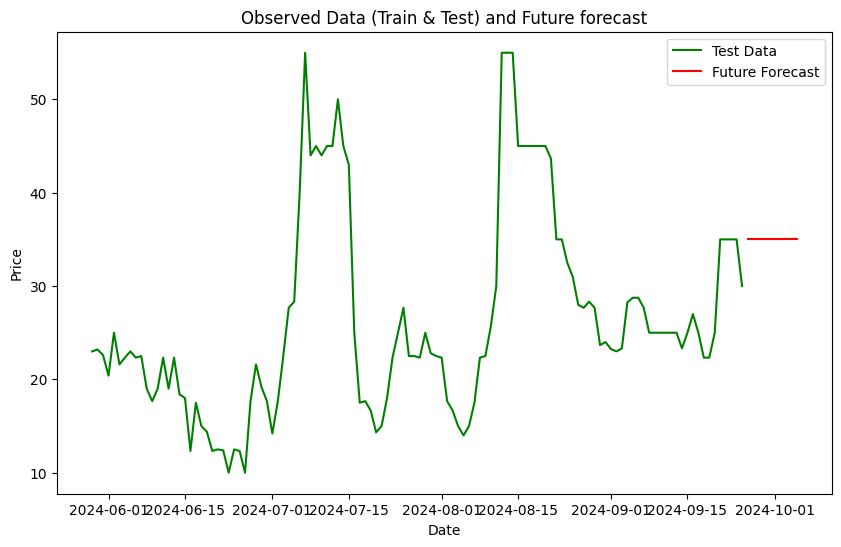

In [130]:
forecast = forecast_price(10)

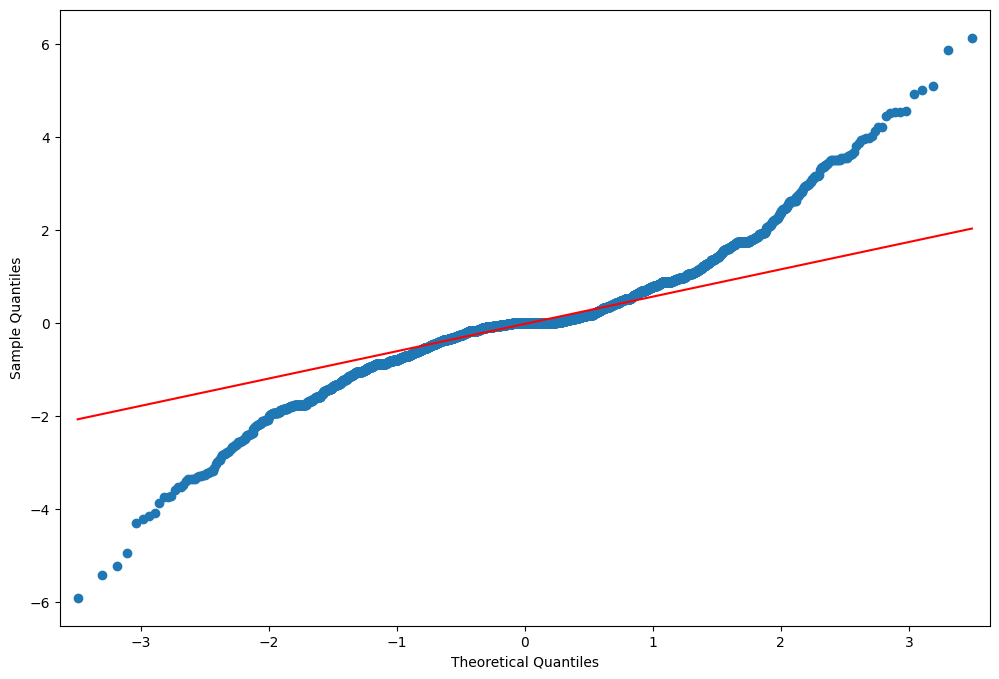

In [132]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(residual, line='q', ax=ax, fit=True)

Deviations from the Line: The blue points deviate significantly from the red line, especially in the tails (both at the lower and upper ends). This suggests that your data might have heavy tails (leptokurtic), meaning there are more extreme values than expected in a normal distribution.
Curved Pattern: The slight S-shape curvature further indicates that the data might not be normally distributed.

# Hybrid Modal


In [149]:
final_df

,Average
Date,
2013-04-15,22.00
2013-04-16,22.00
2013-04-17,18.00
2013-04-18,20.00
2013-04-19,20.75
...,...
2024-09-21,35.00
2024-09-22,35.00
2024-09-23,35.00


In [150]:
train_data = final_df[:int(length*0.8)]
test_data = final_df[int(length*0.8):]

In [151]:
def noramalizing_data(train_data, test_data):
        scaler = StandardScaler()
        

        train_data = scaler.fit_transform(train_data.values.reshape(-1,1))

        test_data = scaler.transform(test_data.values.reshape(-1,1))
        
        #print(test_data)
        return  test_data,train_data,scaler

In [152]:
normalize_train, normailize_test, scaler = noramalizing_data(train_data,test_data)

In [154]:
def train_spliting(train):
    window_size = 60
    # Creating a data structure with 60 timesteps and 1 output
    X_train = []
    y_train = []
    for i in range(window_size, train.shape[0]):
        X_train.append(train[i-window_size:i]) 
        y_train.append(train[i, -1]) # consider Close as target
    # Change them to numpy array
    X_train, y_train = np.array(X_train).astype('float32'), np.array(y_train).reshape(-1,1)
    return X_train,y_train

In [155]:
X_train, y_train = train_spliting(normalize_train)

In [182]:
X_train

array([[[-0.15574005],
        [-0.25967687],
        [-0.5021961 ],
        ...,
        [-0.4098078 ],
        [-0.01138338],
        [-0.30009672]],

       [[-0.25967687],
        [-0.5021961 ],
        [-0.6869726 ],
        ...,
        [-0.01138338],
        [-0.30009672],
        [-0.30009672]],

       [[-0.5021961 ],
        [-0.6869726 ],
        [-0.44445342],
        ...,
        [-0.30009672],
        [-0.30009672],
        [-0.5599387 ]],

       ...,

       [[-0.57899386],
        [-0.8775234 ],
        [-0.8775234 ],
        ...,
        [-0.73316675],
        [-0.15574005],
        [-0.15574005]],

       [[-0.8775234 ],
        [-0.8775234 ],
        [-0.8873397 ],
        ...,
        [-0.15574005],
        [-0.15574005],
        [-0.15574005]],

       [[-0.8775234 ],
        [-0.8873397 ],
        [-0.73316675],
        ...,
        [-0.15574005],
        [-0.15574005],
        [-0.15574005]]], dtype=float32)

In [189]:
X_train = np.array(X_train, dtype= object)
y_train = np.array(y_train, dtype= object)

In [184]:
X_train

array([[[-0.15574005],
        [-0.25967687],
        [-0.5021961 ],
        ...,
        [-0.4098078 ],
        [-0.01138338],
        [-0.30009672]],

       [[-0.25967687],
        [-0.5021961 ],
        [-0.6869726 ],
        ...,
        [-0.01138338],
        [-0.30009672],
        [-0.30009672]],

       [[-0.5021961 ],
        [-0.6869726 ],
        [-0.44445342],
        ...,
        [-0.30009672],
        [-0.30009672],
        [-0.5599387 ]],

       ...,

       [[-0.57899386],
        [-0.8775234 ],
        [-0.8775234 ],
        ...,
        [-0.73316675],
        [-0.15574005],
        [-0.15574005]],

       [[-0.8775234 ],
        [-0.8775234 ],
        [-0.8873397 ],
        ...,
        [-0.15574005],
        [-0.15574005],
        [-0.15574005]],

       [[-0.8775234 ],
        [-0.8873397 ],
        [-0.73316675],
        ...,
        [-0.15574005],
        [-0.15574005],
        [-0.15574005]]], dtype=float32)

In [187]:
print("X_train shape:", X_train.shape, "Type:", type(X_train))
print("y_train shape:", y_train.shape, "Type:", type(y_train))


X_train shape: (777, 60, 1) Type: <class 'numpy.ndarray'>
y_train shape: (777, 1) Type: <class 'numpy.ndarray'>


In [198]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, InputLayer
from tensorflow.keras.optimizers import Adam

# Assuming X_train and y_train are already defined and of correct shapes
# If you need to define them, use the following for example data:
# X_train = np.random.rand(777, 60, 1)  # Replace with your actual data
# y_train = np.random.rand(777, 1)      # Replace with your actual data

# Ensure X_train and y_train are numpy arrays (you've confirmed this)
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

# Print shapes and types for debugging
print("X_train shape:", X_train.shape, "Type:", type(X_train))
print("y_train shape:", y_train.shape, "Type:", type(y_train))

# Check for NaNs or Infs
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("X_train contains NaNs or Infs")
if np.any(np.isnan(y_train)) or np.any(np.isinf(y_train)):
    print("y_train contains NaNs or Infs")

# Define the LSTM model
model_lstm = Sequential()

# Input layer
model_lstm.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))  # Input layer

# LSTM layer with 256 units
model_lstm.add(LSTM(units=256, return_sequences=False))  # Set return_sequences=False for the last LSTM layer

# Dropout layer to prevent overfitting
model_lstm.add(Dropout(0.2))

# Final dense layer for regression output
model_lstm.add(Dense(units=1))

# Compile the model with Adam optimizer
adam_opt = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=adam_opt, loss='mse')

# Display model summary
model_lstm.summary()

# Train the model
history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust batch size if needed


X_train shape: (777, 60, 1) Type: <class 'numpy.ndarray'>
y_train shape: (777, 1) Type: <class 'numpy.ndarray'>


ValueError: object __array__ method not producing an array

In [175]:
def model_trainer(X_train, y_train):
    
    model = Sequential()
    
    # First Conv1D layer with input shape (timesteps, features)
    model.add(Convolution1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train[1,:].shape)))
    
    # Second Conv1D layer
    model.add(Convolution1D(filters=256, kernel_size=3, activation='relu'))
    
    # Flatten before the LSTM
    model.add(Flatten())
    
    model.add(RepeatVector(y_train.shape[1]))
    # LSTM layer that does not return sequences
    model.add(LSTM(128, activation='relu'))
    
    # Dense layer for output
    model.add(Dense(100, activation='relu'))
    
    # Final Dense layer to predict a single value (for each sample)
    model.add(Dense(1))
    
    # Compile the model
    model.compile(loss='mse', optimizer='adam')
    
    # Fit the model
    model.fit(X_train, y_train, epochs=200, batch_size=100)
    
    model.summary()
    
    return model


In [176]:
X_train.shape

(777, 60, 1)

In [ ]:



python -m pip install "pymongo[srv]"==3.6

In [177]:
y_train.shape

(777, 1)

In [178]:
model_trainer = model_trainer(X_train, y_train)

d:\Unversity\Project\Kalimati-tarkari\kalimati_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: object __array__ method not producing an array

In [147]:
def test_spliting(train_data,test_data):
        train, test,scaler = noramalizing_data(train_data,test_data)
        window_size = 60
        # Concatenate train data to test data
        dataset_total = np.concatenate((train, test), axis = 0)
        # Split test data and last window-size of train data
        inputs = dataset_total[len(dataset_total) - len(test) - window_size:]
        # Do the same thing for test data
        X_test = []
        y_test = []
        for i in range(window_size, window_size+len(test)):
            X_test.append(inputs[i-window_size:i,:]) 
            y_test.append(inputs[i,-1]) # consider Close as target
        # Change them to numpy array
        X_test, y_test = np.array(X_test).astype('float32'), np.array(y_test).reshape(-1, 1)
    
        return X_test,y_test,scaler

In [148]:
x_test, y_test, scaler = test_spliting(train_data,test_data)

In [ ]:

    
    


    def helper_forecast(self,column_name,key):
        X_test, _,scaler = self.test_spliting(column_name)
        
        logger.info("Forecasting Start ")
        logger.info(X_test.shape)
        models = [self.M01AB,
                  self.M01AE,
                  self.N02BA,
                  self.N02BE,
                  self.N05B,
                  self.N05C,
                  self.R03,
                  self.R06]
        time_distribution = ['time_distributed_1',
                             'time_distributed_3',
                             'time_distributed_5',
                             'time_distributed_7',
                             'time_distributed_9',
                             'time_distributed_11',
                             'time_distributed_13',
                             'time_distributed_15']
        
        x_input=X_test[-1:].reshape(1,-1)
        
        
        temp_input=list(x_input)
        temp_input=temp_input[0].tolist()
        logger.info(len(temp_input))
        
    
        lst_output = []
        n_step = 60
        i = 0
        while i<30:
        
            if len(temp_input) >60:
                x_input=np.array(temp_input[1:])
                x_input=x_input.reshape(1,-1)
                x_input = x_input.reshape((1, n_step, 1))
                #print(x_input)
                #forecast.append(x_input)
                #print(forecast)
                #logger.info("60 >")
                x_input = tf.constant(x_input, dtype=tf.float32)
                model = models[key].signatures["serving_default"]
                test_predict = model(x_input)
                #logger.info(test_predict)
                #print(test_predict)
                predictions = test_predict[time_distribution[key]].numpy()
                temp_input=temp_input[1:]
                lst_output.extend(predictions[0][0].tolist())
                i=i+1

            else:
                x_input = np.array(x_input)
                x_input = x_input.reshape((1, n_step,1))
                
                #x_input = x_input.astype(float) 
                model = models[key].signatures["serving_default"]
                test_predict = model(tf.constant(x_input))
                #logger.info(test_predict)
                #print(test_predict)
                predictions = test_predict[time_distribution[key]].numpy()
                #yhat = model.predict(x_input, verbose=0)
                temp_input.extend(predictions[0][0].tolist())
                lst_output.extend(predictions[0][0].tolist())
                i = i+1
                #logger.info(type(temp_input[0]))
                    
       

        
        return lst_output,scaler
    def forecasting(self):
        
        today = datetime.datetime.now().strftime('%m/%d/%Y')
        forecast_dates=pd.date_range(start=today, periods = 30)
        forecast=pd.DataFrame(forecast_dates,columns=['Date'])
        forecast['Date']=pd.to_datetime(forecast['Date'])
        forecast.sort_values('Date',inplace=True)
        columns = ["M01AB",
            "M01AE",
            "N02BA",
            "N02BE",
            "N05B",
            "N05C",
            "R03",
            "R06"]
        for i,val in enumerate(columns):
            forecast_data,scaler = self.helper_forecast(val,i)
            forecast_data=scaler.inverse_transform(np.array(forecast_data).reshape(-1, 1))
            forecast[val] = forecast_data
            
        return forecast.to_csv("artifacts/forecast_data/forecast.csv",index=False),forecast